In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

C:\Users\eghan\AppData\Local\Temp\ipykernel_21820\4270306199.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("boston.csv")
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


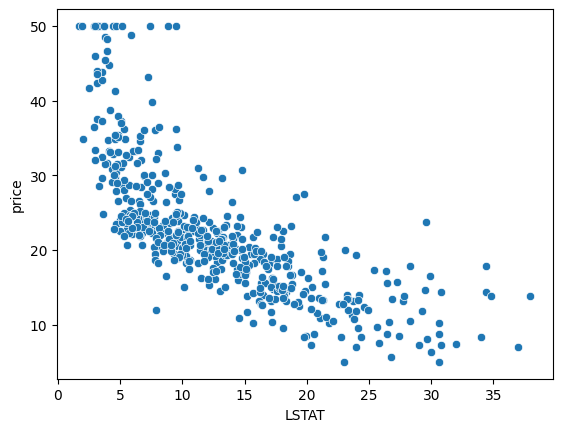

In [19]:
sns.scatterplot(x="LSTAT", y="price", data=df)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
df_sc = sd.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247


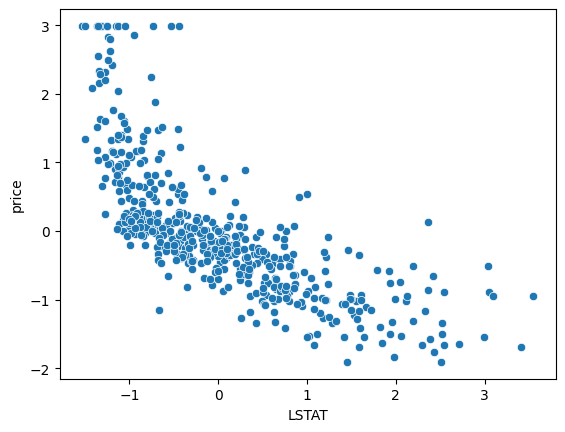

In [22]:
sns.scatterplot(x="LSTAT", y="price", data=df_sc)
plt.show()

In [24]:
y = df_sc["price"]
X = df_sc.drop("price", axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    RidgeCV,
    Lasso,
    LassoCV,
    ElasticNet,
    ElasticNetCV,
)

In [27]:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

In [28]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [29]:
df_predictions = pd.DataFrame(
    {
        "y_test": y_test,
        "y_hat_linear": y_hat_linear,
        "y_hat_ridge": y_hat_ridge,
        "y_hat_lasso": y_hat_lasso,
        "y_hat_net": y_hat_net,
    }
)
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
250,0.203221,0.208611,0.210848,-0.043954,0.092410
116,-0.145059,0.079595,0.082295,-0.043954,-0.029578
295,0.660338,0.507882,0.507021,-0.043954,0.089421
127,-0.689247,-0.763902,-0.761427,-0.043954,-0.136516
311,-0.047106,0.516242,0.513779,-0.043954,0.083315


In [38]:
coefficients = pd.DataFrame(
    {"Features": df.drop("price", axis=1, inplace=False).columns}
)
coefficients["model_lin"] = model_linear.coef_
coefficients["model_ridge"] = model_ridge.coef_
coefficients["model_lasso"] = model_lasso.coef_
coefficients["model_net"] = model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,CRIM,-0.108678,-0.107685,-0.0,-0.000000
1,ZN,0.150409,0.148285,0.0,0.000000
2,INDUS,-0.027291,-0.029614,-0.0,-0.000000
3,CHAS,0.080306,0.080689,0.0,0.000000
4,NOX,-0.182517,-0.179088,-0.0,-0.000000
5,RM,0.217475,0.218655,0.0,0.014597
6,AGE,-0.033743,-0.034299,-0.0,-0.000000
7,DIS,-0.362697,-0.358751,0.0,0.000000
8,RAD,0.282598,0.273949,-0.0,-0.000000
9,TAX,-0.231535,-0.223640,-0.0,-0.000000


In [39]:
import numpy as np


def calculate_rmse(y_true, y_pred):
    mse = np.mean(np.square(y_true - y_pred))
    return np.round(np.sqrt(mse), 3)


models = ["linear", "ridge", "lasso", "net"]
for model in models:
    rmse = calculate_rmse(df_predictions["y_test"], df_predictions[f"y_hat_{model}"])
    print(f"RMSE for {model}: {rmse}")

RMSE for linear: 0.599
RMSE for ridge: 0.6
RMSE for lasso: 1.177
RMSE for net: 1.07


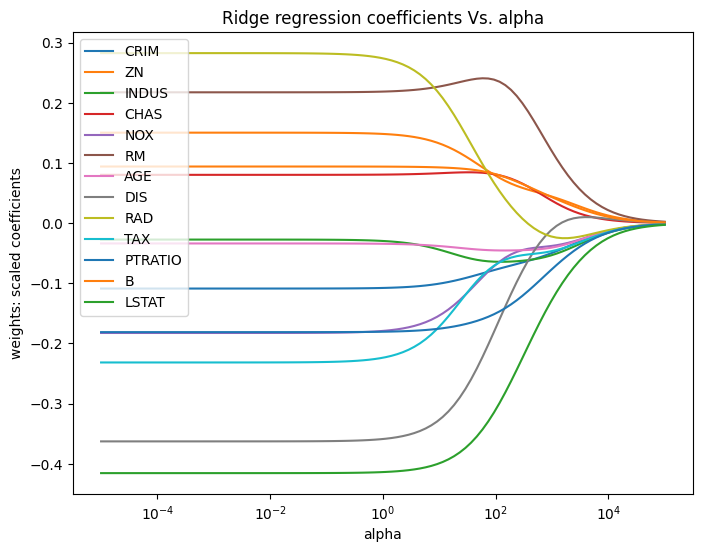

In [58]:
alpha_ridge = 10 ** np.linspace(-5, 5, 100)

ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha=i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Ridge regression coefficients Vs. alpha")
plt.legend(df.drop("price", axis=1, inplace=False).columns)

plt.show()

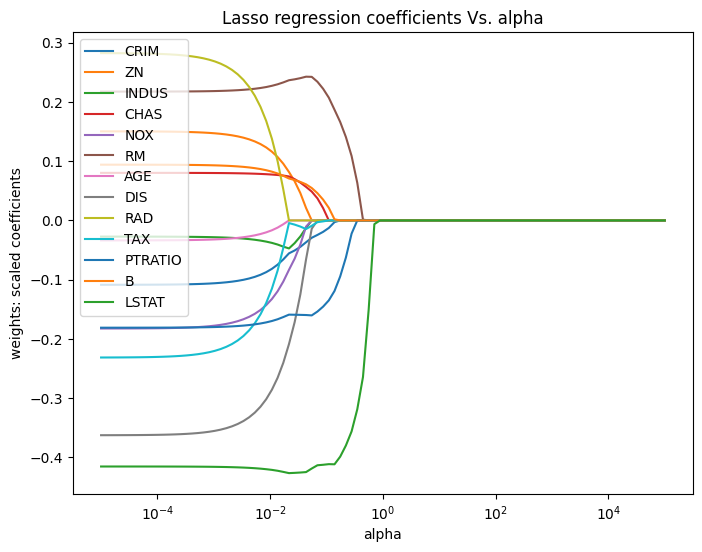

In [59]:
alpha_lasso = 10 ** np.linspace(-5, 5, 100)

lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)


plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Lasso regression coefficients Vs. alpha")
plt.legend(df.drop("price", axis=1, inplace=False).columns)

plt.show()

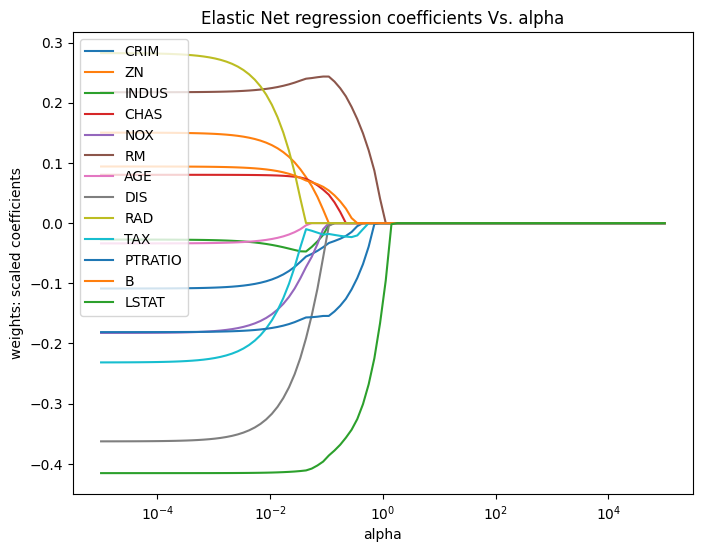

In [61]:
alpha_elasticnet = 10 ** np.linspace(-5, 5, 100)
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha=i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)


plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights: scaled coefficients")
plt.title("Elastic Net regression coefficients Vs. alpha")
plt.legend(df.drop("price", axis=1, inplace=False).columns)

plt.show()